<a href="https://colab.research.google.com/github/AjmiyaSalim/Random-Forest-Clas/blob/main/Water_Quality_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The **Random Forest Classifier** is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy and reduce overfitting. Each tree is trained on a random subset of the data and features, and the final prediction is made by majority voting. This makes Random Forest robust, efficient, and well-suited for classification tasks.

In this project, the model is applied to the **Water Quality Dataset**, which contains measurements of various chemical and physical properties of water (such as pH, hardness, sulfate, conductivity, and turbidity). The target variable indicates whether the water is **potable (safe to drink)** or **not potable**. By learning from these features, the Random Forest model can predict the safety of drinking water with high accuracy.


In [ ]:
import pandas as pd
data=pd.read_csv('/content/water_quality_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0
...,...,...,...,...,...,...,...,...,...,...
9995,7.020971,195.918303,21485.847739,7.019282,332.814656,430.637117,14.470552,67.697333,3.912803,0
9996,7.238648,195.613341,21565.440906,7.095263,332.829069,426.360715,14.267106,65.859665,3.978627,0
9997,7.073473,194.461197,21951.368744,7.077604,335.432478,419.875824,14.306482,64.515396,4.015702,0
9998,6.846060,177.829127,16515.670391,6.147210,308.901696,542.997099,12.626474,60.900254,4.709374,0


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining datasets to understand their structure, patterns, and key characteristics before applying machine learning algorithms.  
One of the first steps in EDA is to quickly inspect a few rows from the dataset to ensure it has loaded correctly and to get an overview of the data format.

### Common EDA Functions

- **head()** – Displays the first 5 rows of the dataset by default. This helps in verifying column names, data types, and sample values at the beginning of the dataset.
- **tail()** – Displays the last 5 rows of the dataset by default. This is useful for checking if the dataset is complete and whether the end of the file has any irregularities or missing data.
- **shape** – Returns the number of rows and columns in the dataset, helping to understand the dataset’s size.
- **isna().sum()** – Counts missing values in each column, helping to detect incomplete data.
- **dtypes** – Lists the data type of each column, useful for identifying numerical, categorical, or datetime variables.
- **info()** – Provides details about column data types, non-null values, and memory usage. Useful for detecting missing values and understanding the structure.
- **describe()** – Generates descriptive statistics such as mean, standard deviation, minimum, and maximum for numerical columns.





In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0


In [ ]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9995,7.020971,195.918303,21485.847739,7.019282,332.814656,430.637117,14.470552,67.697333,3.912803,0
9996,7.238648,195.613341,21565.440906,7.095263,332.829069,426.360715,14.267106,65.859665,3.978627,0
9997,7.073473,194.461197,21951.368744,7.077604,335.432478,419.875824,14.306482,64.515396,4.015702,0
9998,6.846060,177.829127,16515.670391,6.147210,308.901696,542.997099,12.626474,60.900254,4.709374,0
9999,7.133203,199.666276,22417.958216,7.192464,333.422721,416.798803,14.307727,66.548909,3.973113,1


In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.091423,196.028208,21984.910331,7.135162,333.063156,426.360604,14.339111,66.465396,3.972793,0.500000
std,0.706589,14.636373,3895.384413,0.710279,18.513111,36.080914,1.484742,7.182162,0.350731,0.500025
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,7.022816,194.609577,21458.018822,7.057332,331.124701,422.515794,14.188197,65.750893,3.935476,0.000000
50%,7.093586,196.057913,21977.488628,7.133492,333.098363,426.246982,14.335375,66.469224,3.973391,0.500000
75%,7.161077,197.460684,22503.494592,7.215818,334.943071,429.921153,14.483844,67.200320,4.010571,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,708.226364,27.006707,124.000000,6.494749,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10000 non-null  float64
 1   Hardness         10000 non-null  float64
 2   Solids           10000 non-null  float64
 3   Chloramines      10000 non-null  float64
 4   Sulfate          10000 non-null  float64
 5   Conductivity     10000 non-null  float64
 6   Organic_carbon   10000 non-null  float64
 7   Trihalomethanes  10000 non-null  float64
 8   Turbidity        10000 non-null  float64
 9   Potability       10000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


In [ ]:
data.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [ ]:
data.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [ ]:
for i in data.columns:
  print(data[i].value_counts())

ph
7.170548    1
5.477283    1
7.248191    1
6.927948    1
7.085592    1
           ..
7.052283    1
7.078913    1
5.400302    1
7.187738    1
7.160466    1
Name: count, Length: 10000, dtype: int64
Hardness
196.262455    1
165.436093    1
195.512635    1
192.594583    1
197.140296    1
             ..
194.971523    1
196.886558    1
140.739062    1
193.202237    1
195.712338    1
Name: count, Length: 10000, dtype: int64
Solids
22428.513908    1
29046.083515    1
22004.571706    1
20989.998069    1
22100.273208    1
               ..
21659.468727    1
21539.185679    1
17266.593422    1
21263.028076    1
22636.785632    1
Name: count, Length: 10000, dtype: int64
Chloramines
7.234256     1
5.523011     1
7.031305     1
7.111978     1
7.240875     1
            ..
7.101790     1
7.104867     1
10.056852    1
7.117409     1
7.235746     1
Name: count, Length: 10000, dtype: int64
Sulfate
331.705421    1
370.893085    1
332.275469    1
333.764962    1
331.973281    1
             ..
335.6699

# Importance of Visualizing the Dataset on Different Features

Visualizing the dataset across different features is a crucial step in the data analysis and machine learning workflow because it helps to:

- **Understand Data Distribution:** Visualization reveals how individual features are distributed , helping identify outliers or anomalies.
- **Detect Relationships and Patterns:** By plotting features against each other or the target variable, we can uncover correlations, trends, or clusters that might be useful for prediction.
- **Identify Feature Importance:** Visual exploration can highlight which features differ significantly between classes or target outcomes, guiding feature selection.
- **Spot Missing or Inconsistent Data:** Visual tools can help identify missing values or inconsistencies that require cleaning.
- **Aid Model Selection and Tuning:** Insights from visualizations assist in choosing the right model and parameters by understanding the complexity of data.
- **Improve Communication:** Graphical representations make it easier to communicate findings and insights to stakeholders who may not be familiar with the technical details.

Overall, visualization provides an intuitive and powerful way to grasp the structure and nuances of the dataset before applying machine learning algorithms.


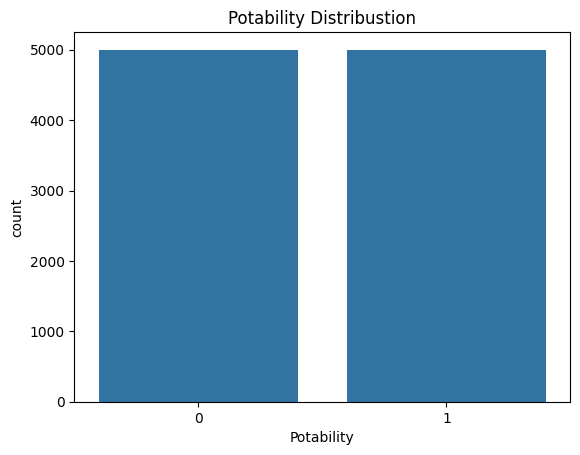

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Potability', data=data)
plt.title('Potability Distribustion')
plt.show()

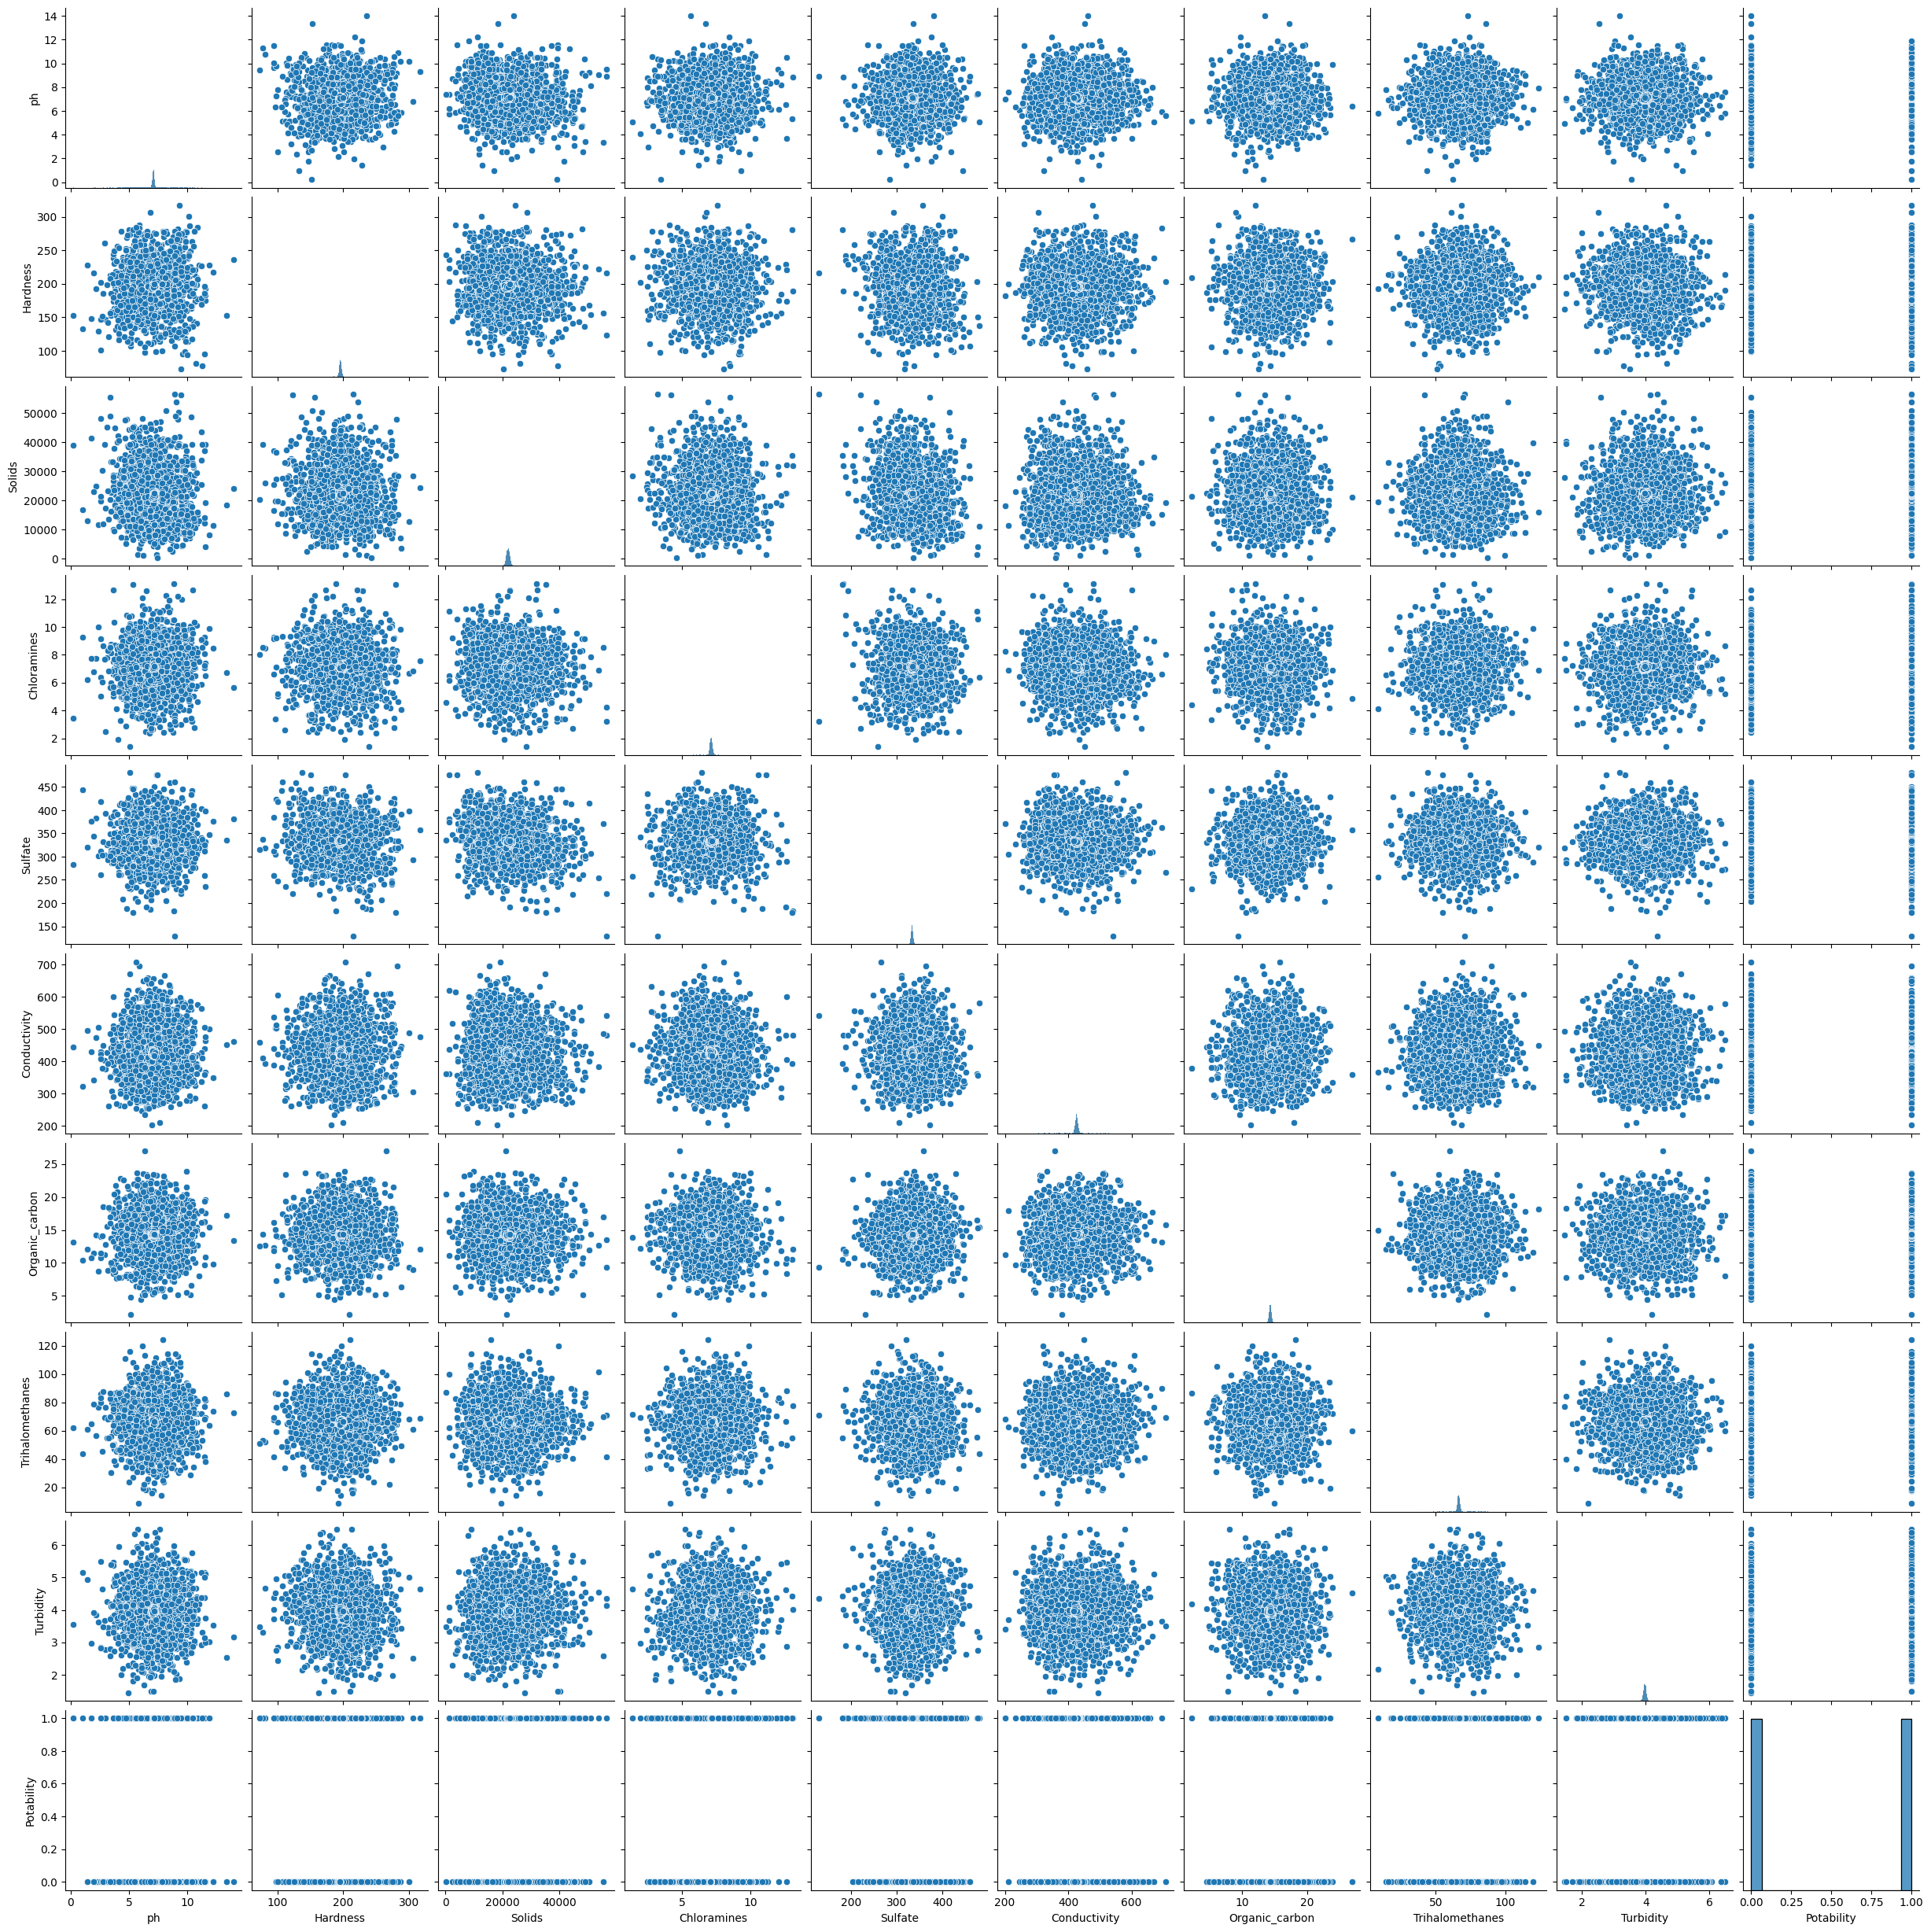

In [ ]:
sns.pairplot(data)

## Splitting the Dataset into Features and Target

Before training a machine learning model, the dataset needs to be separated into:

- **Features (X):** The input variables used for prediction.
- **Target (y):** The output variable to be predicted.

After separating, the data is split into **training** and **testing** sets. The training set is used to train the model, while the testing set evaluates its performance on unseen data.




In [ ]:
X=data.iloc[:,0:9]
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Random Forest Classifier Implementation

In this step, we implement the **Random Forest Classifier** using the scikit-learn library.  

- **n_estimators=250** → Builds 250 decision trees for better ensemble performance.  
- **criterion='gini'** → Uses the Gini impurity measure to evaluate splits.  
- **max_depth=6** → Limits each decision tree to a maximum depth of 6 to avoid overfitting.  
- **class_weight='balanced'** → Handles imbalanced classes by adjusting weights inversely proportional to class frequencies.  

The model is then trained using the **training dataset (X_train, y_train)** and predictions are generated for the **test set (X_test)**.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=250,criterion='gini',max_depth=6,class_weight='balanced')
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
y_predict

array([1, 1, 0, ..., 0, 0, 0])

Accuracy Score: 84.2
Confusion Matrix:
 [[871 135]
 [181 813]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1006
           1       0.86      0.82      0.84       994

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



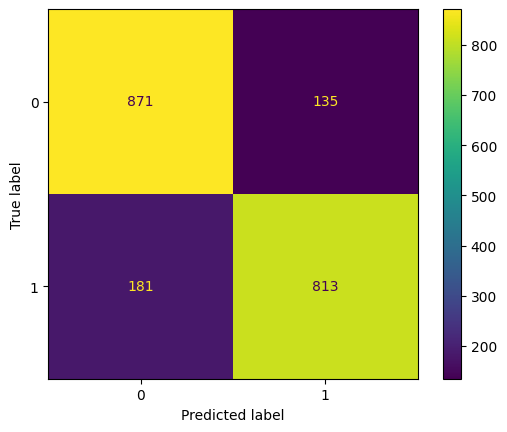

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
accuracy=accuracy_score(y_test,y_predict)*100
print('Accuracy Score:',accuracy)
cm=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:\n',cm)
cr=classification_report(y_test,y_predict)
print('Classification Report:\n',cr)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
print(cmd)

In [ ]:
train_predict=model.predict(X_train)
train_accuracy=accuracy_score(y_train,train_predict)
print('train accuracy:',train_accuracy)

test_predict=model.predict(X_test)
test_accuracy=accuracy_score(y_test,test_predict)
print('test accuracy:',test_accuracy)

train accuracy: 0.86925
test accuracy: 0.842


## Conclusion

The Random Forest Classifier achieved a **test accuracy of 84.2%**, which indicates strong predictive performance on the water quality dataset.  

- The **confusion matrix** shows balanced performance between potable (1) and non-potable (0) classes, with relatively low misclassification rates.  
- From the **classification report**, both precision and recall are above 0.82 for each class, demonstrating that the model is consistent in identifying safe and unsafe water samples.  
- The **train accuracy (86.9%)** is slightly higher than the **test accuracy (84.2%)**, suggesting that the model generalizes well with only minor overfitting.  

Overall, the model performs reliably in classifying water potability, making it a suitable choice for practical applications in water quality assessment.
